<a href="https://colab.research.google.com/github/huenemoerder/artenraten/blob/main/ArtenRaten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arten Raten




In [1]:
!pip install icrawler

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from icrawler.builtin import GoogleImageCrawler
import os
from PIL import Image
import random

Das Datenset laden

In [3]:
url = 'https://raw.githubusercontent.com/huenemoerder/artenraten/main/Klausurarten.csv'
df = pd.read_csv(url)

In [53]:
from IPython.display import clear_output

def getRandomPrompts(df, number=100):
  random_rows = df.sample(n=number, replace=True)
  return random_rows

def fetchRandomImage(search_term):
  google_crawler = GoogleImageCrawler(
    feeder_threads=1,
    parser_threads=1,
    downloader_threads=10,
    storage={'root_dir': f'./{search_term}/'})
  google_crawler.set_logger(log_level=50)
  img = google_crawler.crawl(keyword = search_term, max_num = 15)
  clear_output()
  return img

def getImages(n=10):
  images = []
  for i in range(n):
    prompt = getRandomPrompts(df, 1)
    search_term = f'{prompt.Gattung.values[0]} {prompt.Art.values[0]}'
    if search_term not in os.listdir('./'):
      fetchRandomImage(search_term)
    image_paths = os.listdir(f'./{search_term}/')
    img_path = image_paths[random.randint(0, len(image_paths)-1)]
    print(img_path)
    img = np.asarray(Image.open(f'./{search_term}/{img_path}'))
    images.append((search_term, img))
  return images

In [93]:
import pandas as pd
from ipywidgets import widgets as widgets2
from IPython.display import display

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

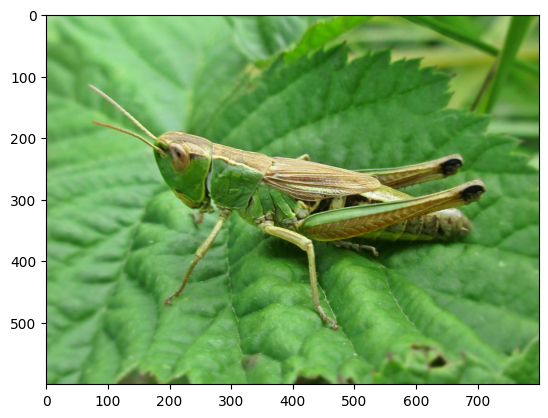

Label(value='Solution')

Button(description='Reveal #0', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

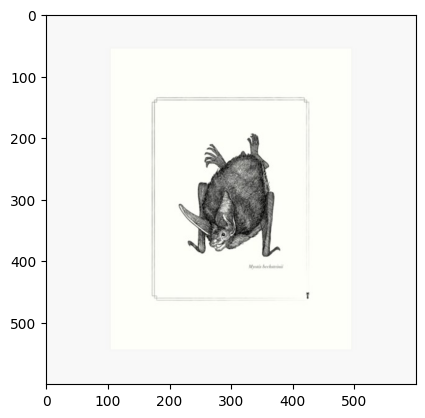

Label(value='Solution')

Button(description='Reveal #1', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

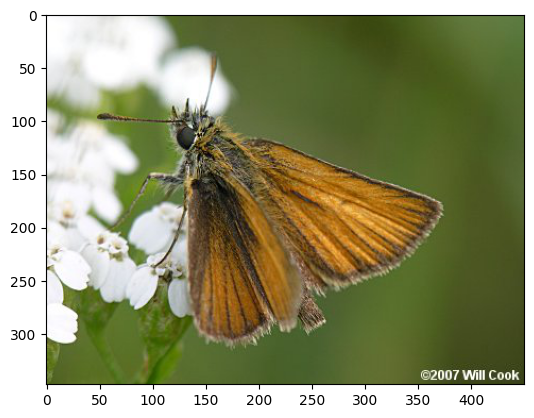

Label(value='Solution')

Button(description='Reveal #2', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

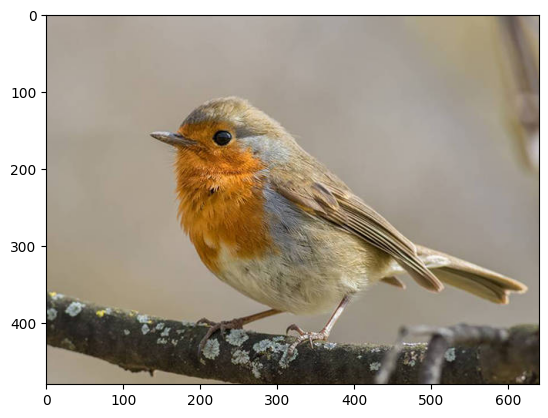

Label(value='Solution')

Button(description='Reveal #3', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

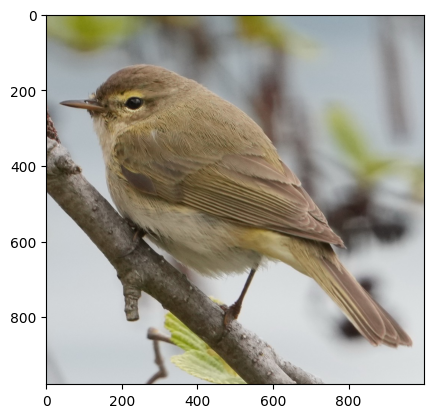

Label(value='Solution')

Button(description='Reveal #4', style=ButtonStyle())

<IPython.core.display.Javascript object>

In [153]:
import time
from google.colab import widgets
import functools

num_imgs = 5
images = getImages(num_imgs)

tb = widgets.TabBar([str(i) for i in range(num_imgs)], location='top')

for i in range(num_imgs):
  with tb.output_to(i, 0):
    plt.imshow(images[i][1])
    btn = widgets2.Button(description=f'Reveal #{i}')
    label = widgets2.Label(value='Solution')
    def on_button_clicked(value, lab, obj):
       lab.value = images[value][0]
    btn.on_click(functools.partial(on_button_clicked, i, label))
    plt.show()
    display(label, btn)